## BB_ILLUSTRATE_DRW

A quick notebook to make example DRW light curves to illustrate how it looks, and what is the meaning of DRW params  

1) plot a well-sampled, long DRW 

2) plot a calculated SF,  and the functional form 

3) plot multiple DRWs, showing that same input params result in vastly different light curves 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

50
200
1000
0.02
0.1
0.5


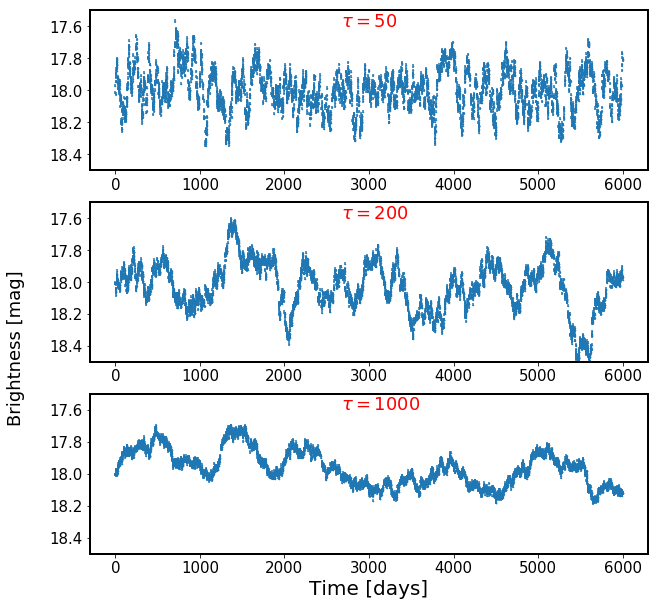

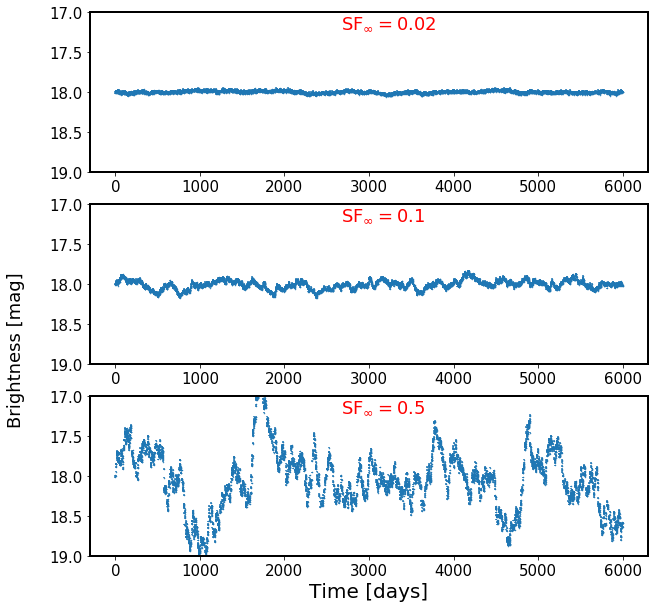

In [4]:
%matplotlib inline 

# We simulate with tau=575 days,  SF_inf = 0.2 mag, which are the 
#  median observed-frame values for the S82 quasar sample (MacLeod+2011, Sec.5.1)
SF_inf = 0.2  # mags
sigma_in = SF_inf / np.sqrt(2)
tau_in = 575 # days 

# simulate DRW

# simulate DRW by spanning a space between minimum and  maximum,
# with 4 points per day 
tmin, tmax = 0,6000
Npts = int((tmax-tmin)) # 1 point per day
t = np.sort(np.random.uniform(tmin, tmax, Npts)) 


fig,axs = plt.subplots(3,1,figsize=(10,10))
ax = np.ravel(axs)

# simulate different taus ... 
i = 0
for tau in [50,200,1000]: 
    #tau= f * tau_in
    print(tau)
    y = mod.sim_DRW_lightcurve(t, SF_inf, tau , 18)

    median_err = 0.01 # mags 
    yerr = np.ones_like(t)*median_err
    yobs = y + yerr * np.random.normal(0,1,size=len(y))

    ax[i].errorbar(t,yobs,yerr, fmt=".", capsize=0,markersize=1)
    ax[i].set_ylim(17.5,18.5)
    ax[i].invert_yaxis()
    s = r'$\tau=$'+str(tau)
    ax[i].text(0.45,0.9, s, transform = ax[i].transAxes, fontsize=18,  color='red')
    #plt.savefig('BB_DRW_example_tau_'+str(i)+'.png', bbox_inches='tight')
    i += 1 
ax[i-1].set_xlabel('Time [days]')
fig.text(0.01,0.5,'Brightness [mag]', rotation=90, fontsize=18,)
plt.savefig('BB_DRW_different_tau.png', bbox_inches='tight', dpi=100)


# simulate different SFinf ... 
fig,axs = plt.subplots(3,1,figsize=(10,10))
ax = np.ravel(axs)
i = 0
tau = 200
ms = [1,1,1]
for SF_inf in [0.02, 0.1, 0.5]: 
    #tau= f * tau_in
    print(SF_inf)
    y = mod.sim_DRW_lightcurve(t, SF_inf, tau , 18)

    median_err = 0.01 # mags 
    yerr = np.ones_like(t)*median_err
    yobs = y + yerr * np.random.normal(0,1,size=len(y))

    ax[i].errorbar(t,yobs,yerr, fmt=".", capsize=0, markersize=ms[i], )
    ax[i].set_ylim(17.,19.)
    ax[i].invert_yaxis()
    s = 'SF'+r'$_{\infty}=$'+str(SF_inf)
    ax[i].text(0.45,0.9, s, transform = ax[i].transAxes, fontsize=18,  color='red')
    #plt.savefig('BB_DRW_example_tau_'+str(i)+'.png', bbox_inches='tight')
    i += 1 
ax[i-1].set_xlabel('Time [days]')
fig.text(0.01,0.5,'Brightness [mag]', rotation=90, fontsize=18,)
plt.savefig('BB_DRW_different_SFinf.png', bbox_inches='tight', dpi=100)

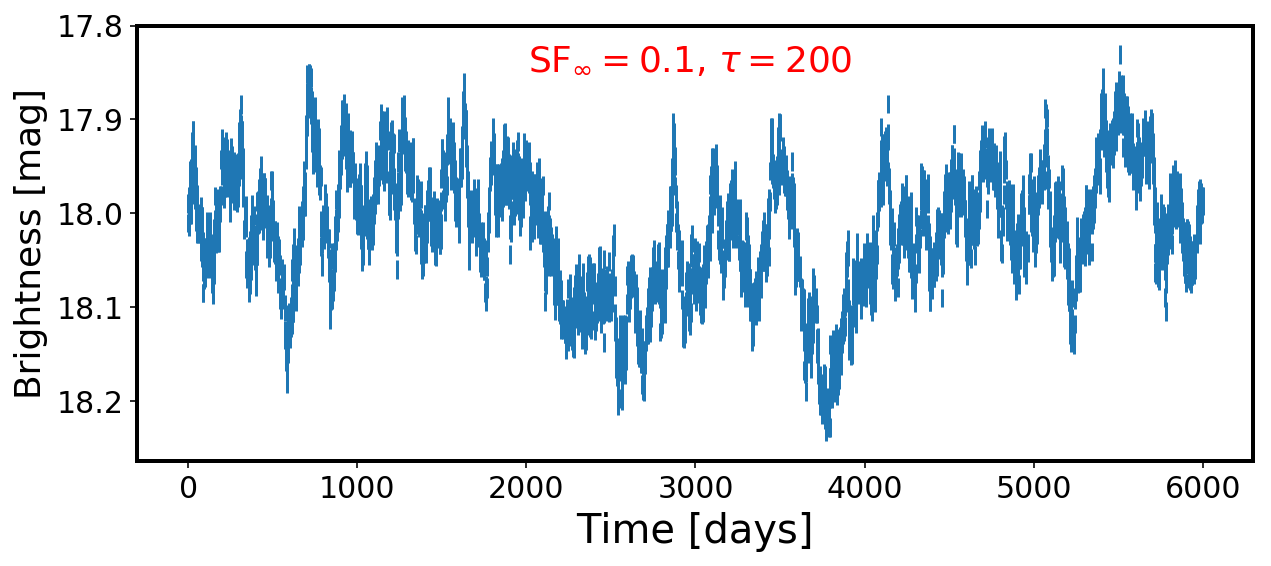

In [87]:
# illustrate tau=200 days,   SFinf = 0.1 mag , yerr = 0.01 mag 
# calculate structure function.... 

%matplotlib inline 
SF_inf = 0.1  # mag 
tau_in = 200 # days 
sigma_in = SF_inf / np.sqrt(2)

# simulate DRW by spanning a space between minimum and  maximum,
tmin, tmax = 0,6000
Npts = int((tmax-tmin)) # 1 point per day
t = np.sort(np.random.uniform(tmin, tmax, Npts)) 

fig,ax = plt.subplots(1,1,figsize=(10,4))

y = mod.sim_DRW_lightcurve(t, SF_inf, tau , 18)
median_err = 0.01 # mags 
yerr = np.ones_like(t)*median_err
yobs = y + yerr * np.random.normal(0,1,size=len(y))

ax.errorbar(t,yobs,yerr, fmt=".", capsize=0, markersize=1)
ax.invert_yaxis()
s = 'SF'+r'$_{\infty}=$'+str(SF_inf) + ', '+r'$\tau=$'+str(tau_in)
ax.text(0.35,0.9, s, transform = ax.transAxes, fontsize=18,  color='red')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Brightness [mag]',fontsize=18,)

# store the LC plotted ...
lc = Table(data = [t,yobs,yerr],names=['t','yobs','yerr'])
lc.write('BB_DRW_illustrate_lc.txt', format='ascii', overwrite=True)
# save the plot /../ 
plt.savefig('BB_DRW_illustrate.png', bbox_inches='tight')


In [88]:
# read the saved plot data ..
lc = Table.read('BB_DRW_illustrate_lc.txt', format='ascii')

lc = lc[::10] # take only every n-th point to make it faster for illustration... 
# Calculate SF inf for that light curve .... 
dt = []
dm = []
for j in range(len(lc['yobs'])-1):
    for k in range(j+1):     
        dt.append(lc['t'][j+1]-lc['t'][k])  # j from 1 and k<j
        dm.append(lc['yobs'][k]-lc['yobs'][j+1])

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


NameError: name 'title' is not defined

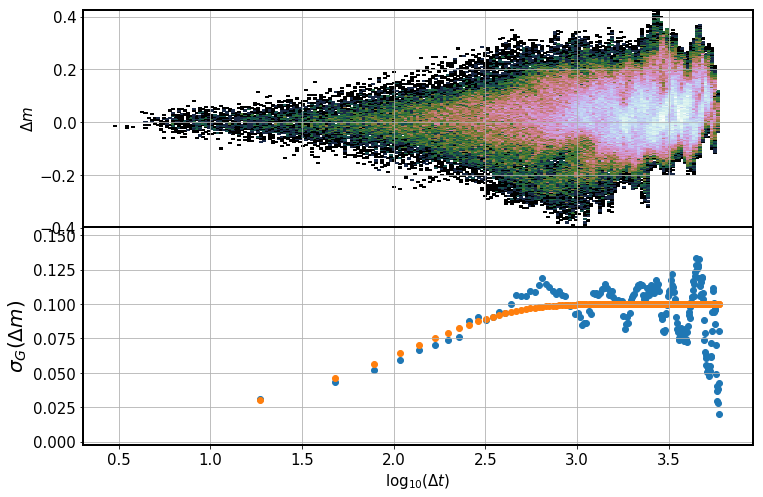

In [52]:
%matplotlib inline

# Plot the raw data... 
import colorcet as cc
from matplotlib.colors import ListedColormap
#cmap = ListedColormap(cc.colorwheel)
cmap = 'cubehelix'

fig,ax = plt.subplots(2,1,figsize=(12,8), sharex=True)

H, xedges, yedges = np.histogram2d(np.log10(dt),dm, bins=200)
H = np.rot90(H)
H = np.flipud(H)
Hmasked = np.ma.masked_where(H==0,H)

image  = ax[0].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap=cmap)
#colorbar = plt.colorbar(image)

ax[0].set_ylabel(r'$\Delta m$',fontsize=15)
ax[0].grid()

nbins = 200
from scipy.stats import binned_statistic
binned_tau = binned_statistic(dt, dt, statistic='mean', bins=nbins)

# calculate st.dev.
#rms_std = lambda x : np.std(x)
#stdev_binned = binned_statistic(delta_t, delta_m, statistic = rms_std, 
                                   #   bins=nbins)
# Plot sigmaG  :
sigmaG = lambda x : 0.7414 *(np.percentile(x,75) - np.percentile(x,25))
binned_sigmaG= binned_statistic(dt, dm, statistic = sigmaG, 
                                      bins=nbins)

# Add theoretical SF .. 
def model_sf(t, sf_inf=0.1, tau = 200):
    br = 1.0-np.exp(-t/tau)
    sf = sf_inf * np.power(br,0.5)
    return sf

ax[1].scatter(np.log10(binned_tau[0]), binned_sigmaG[0])
ax[1].scatter(np.log10(binned_tau[0]), model_sf(binned_tau[0]))
ax[1].grid()
ax[1].set_xlabel(r'$\log_{10}(\Delta t )$', fontsize=15)
ax[1].set_ylabel(r'$\sigma_{G}(\Delta m)$')

fig.subplots_adjust(hspace=0)

ax[0].set_title(title)
plt.savefig( 'BB_DRW_SF.png', bbox_inches='tight')

Just plot the SF ... 

BB_theoretical_SF-0.2_tau-50_.png
BB_theoretical_SF-0.2_tau-200_.png
BB_theoretical_SF-0.2_tau-1000_.png
BB_theoretical_SF-0.02_tau-200_.png
BB_theoretical_SF-0.1_tau-200_.png
BB_theoretical_SF-0.5_tau-200_.png


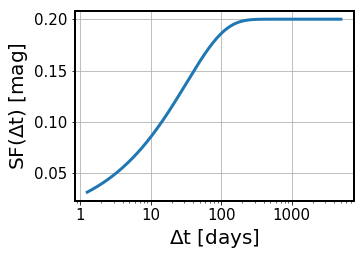

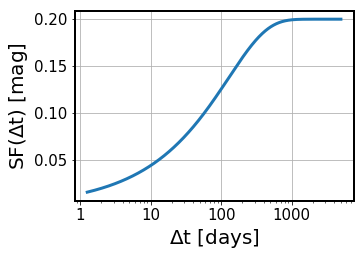

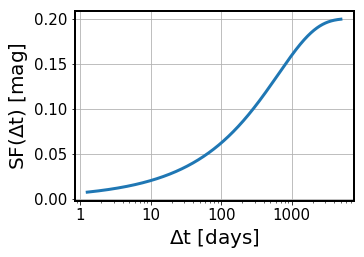

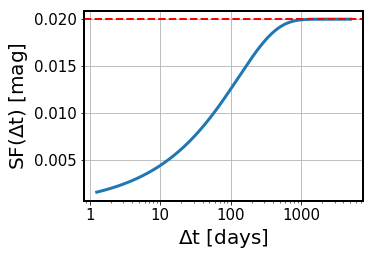

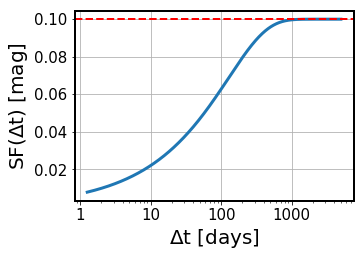

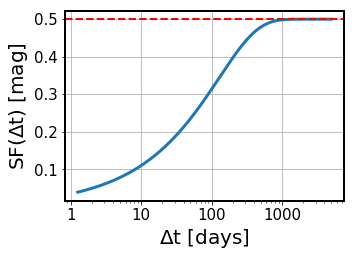

In [29]:
%matplotlib inline


def model_sf(dt, sf_inf=0.1, tau = 200):
    br = 1.0-np.exp(-dt/tau)
    sf = sf_inf * np.power(br,0.5)
    return sf
SF_inf = 0.2
for tau_in in [50,200,1000] : 
    fig,ax = plt.subplots(1,1,figsize=(5,3.5))
    dt = np.logspace(0.1,3.7, 1000)
    ax.plot(dt, model_sf(dt, sf_inf = SF_inf, tau=tau_in),ls='-', lw=3)
    ax.set_xscale("log")
    from matplotlib.ticker import ScalarFormatter
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.set_xlabel(r'$\Delta \mathrm{t}$'+r' $\mathrm{[days]}$')
    ax.set_ylabel(r'$\mathrm{SF} ( \Delta \mathrm{t} )$'+r' $\mathrm{[mag]}$')
    s = r'$\tau=$'+str(tau_in)
    #ax.text(0.15,0.8, s, transform = ax.transAxes, fontsize=18,  color='red')
    figname = 'BB_theoretical_SF-'+str(SF_inf)+'_tau-'+str(tau_in)+'_.png'
    print(figname)
    ax.grid()
    plt.savefig(figname, bbox_inches='tight')
    
tau_in = 200
for SF_inf in [0.02, 0.1,0.5] : 
    fig,ax = plt.subplots(1,1,figsize=(5,3.5))
    dt = np.logspace(0.1,3.7, 1000)
    ax.plot(dt, model_sf(dt, sf_inf = SF_inf, tau=tau_in),ls='-', lw=3)
    ax.set_xscale("log")
    from matplotlib.ticker import ScalarFormatter
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.set_xlabel(r'$\Delta \mathrm{t}$'+r' $\mathrm{[days]}$')
    ax.set_ylabel(r'$\mathrm{SF} ( \Delta \mathrm{t} )$'+r' $\mathrm{[mag]}$')
    ax.axhline(SF_inf, ls='--',lw=2,color='red')
    s = 'SF'+r'$_{\infty}=$'+str(SF_inf) 
    #ax.text(0.15,0.8, s, transform = ax.transAxes, fontsize=18,  color='red')
    figname = 'BB_theoretical_SF-'+str(SF_inf)+'_tau-'+str(tau_in)+'_.png'
    print(figname)
    ax.grid()
    plt.savefig(figname, bbox_inches='tight')

In [25]:
np.sqrt( ( np.e  - 1 )/ np.e)

0.7950600976206501

Illustrate multiple DRWs with the same tau, SFinf...

Use the Celerite fit for SDSS LC 3104329  : tau = 104 days,  sigma = 0.13 mag  ( SFinf = 0.18 mag)  :

104 0.18
104 0.18
104 0.18
104 0.18


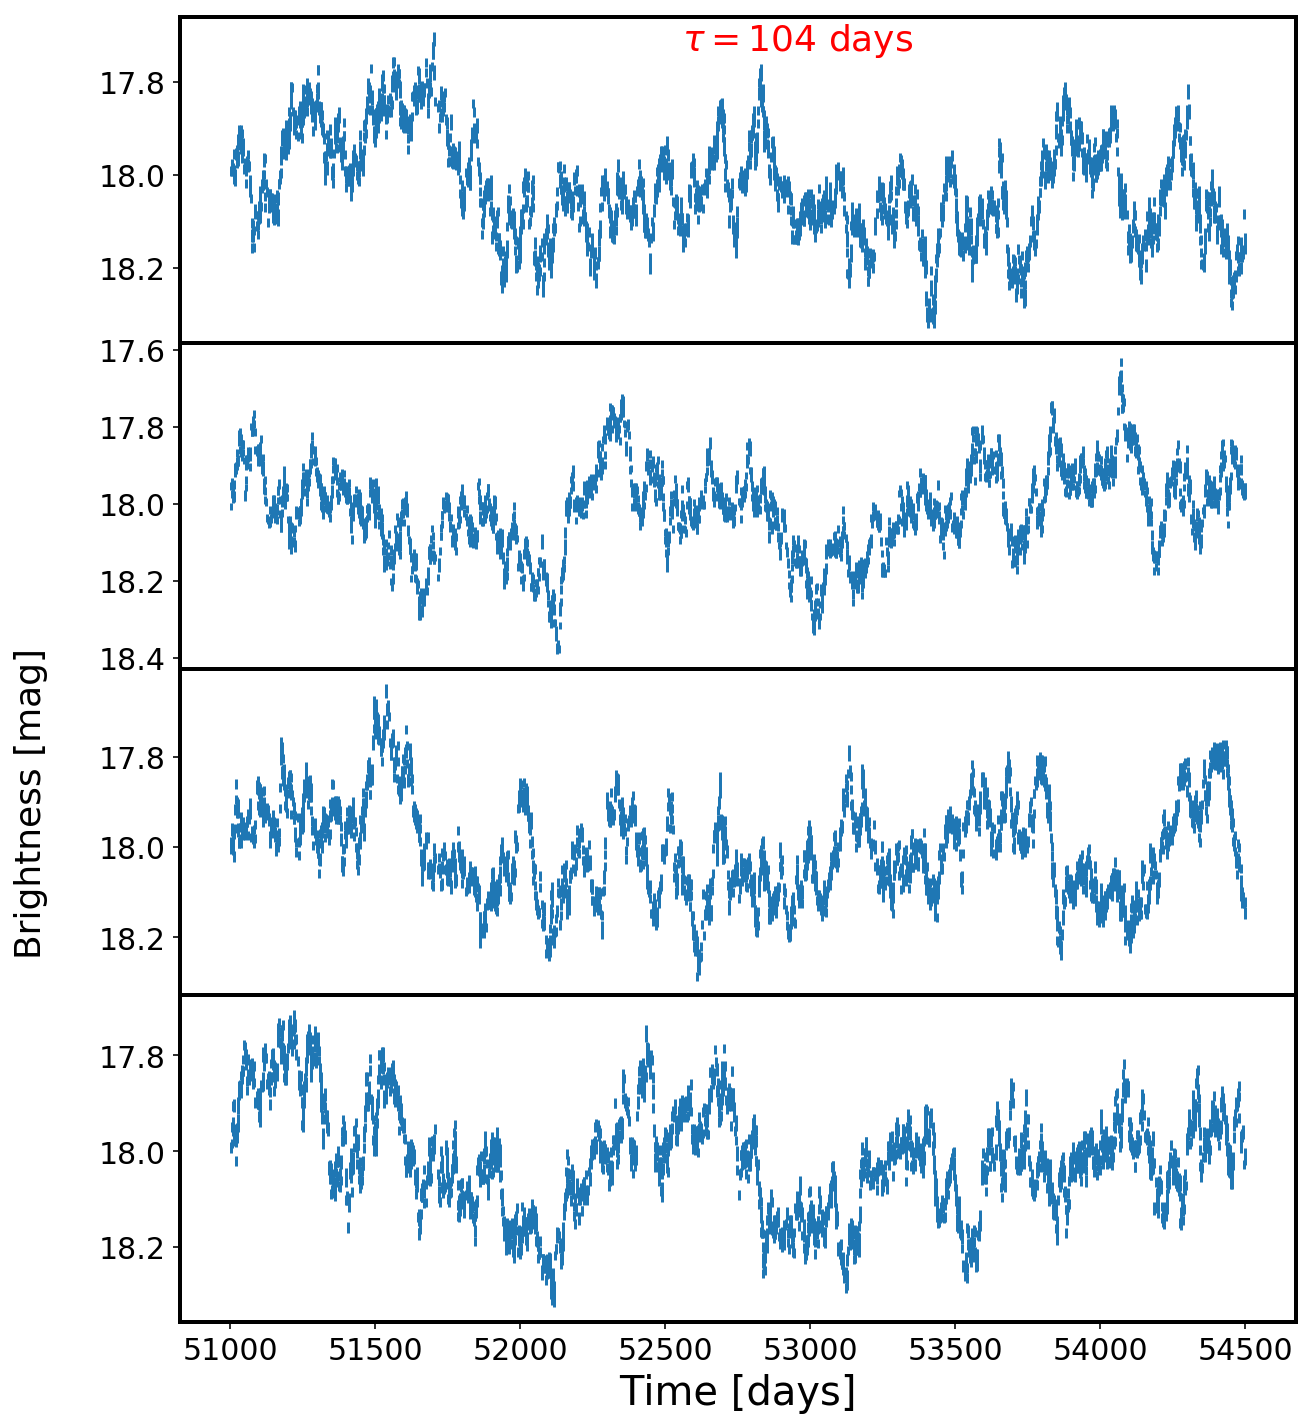

In [95]:
%matplotlib inline 
%config InlineBackend.figure_format='retina'
# We simulate with tau=575 days,  SF_inf = 0.2 mag, which are the 
#  median observed-frame values for the S82 quasar sample (MacLeod+2011, Sec.5.1)
 
sigma_in = SF_inf / np.sqrt(2)
tau = 104 # days 

# simulate DRW

# simulate DRW by spanning a space between minimum and  maximum,
# with 4 points per day 
tmin, tmax = 51000, 54500
Npts = int((tmax-tmin)) # 1 point per day
t = np.sort(np.random.uniform(tmin, tmax, Npts)) 


fig,axs = plt.subplots(4,1,figsize=(10,12))
ax = np.ravel(axs)

# simulate different DRW realizations... 
SF_inf = 0.18  # mags
s = r'$\tau=$'+str(tau)+' days'
ax[0].text(0.45,0.9, s, transform = ax[0].transAxes, fontsize=18,  color='red')
i = 0
fname = 'BB_DRW_different_realiz_pars_as_3104329'

lc = {}
lc['tau'] = tau
lc['SF_inf'] = SF_inf
for i in range(len(ax)):
    lc[i] = {}
    print(tau, SF_inf)
    y = mod.sim_DRW_lightcurve(t, SF_inf, tau , 18)

    median_err = 0.01 # mags 
    yerr = np.ones_like(t)*median_err
    yobs = y + yerr * np.random.normal(0,1,size=len(y))
    lc[i]['t'] = t
    lc[i]['y'] = y
    lc[i]['yobs'] = yobs
    lc[i]['yerr'] = yerr
    
    ax[i].errorbar(t,yobs,yerr, fmt=".", capsize=0, markersize=1)
    ax[i].invert_yaxis()
i += 1 
ax[i-1].set_xlabel('Time [days]')
np.save(fname, lc,)
fig.subplots_adjust(hspace=0)
fig.text(0.01,0.5,'Brightness [mag]', rotation=90, fontsize=18,)
plt.savefig(fname+'.png', bbox_inches='tight', dpi=100)

